# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 # Выбор данных из большого объема данных
from DatasetHandler import *

In [4]:
data = get_small(path="/Users/evgenii/DDoS Dataset/final_dataset.csv",size=110000,random_state=42)

In [5]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.28-52.14.136.135-80-64777-6,52.14.136.135,64777,172.31.69.28,80,6,22/02/2018 12:24:20 AM,2028,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
1,172.31.69.28-18.219.9.1-80-59013-6,172.31.69.28,80,18.219.9.1,59013,6,21/02/2018 11:49:38 PM,1763,4,3,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
2,172.31.65.29-54.246.237.176-50360-443-6,172.31.65.29,50360,54.246.237.176,443,6,20/02/2018 10:57:54,119961344,14,19,...,20,155920.666667,173356.930648,509784.0,85086.0,1.983764e+07,377288.595924,19999747.0,19068180.0,Benign
3,172.31.69.25-18.219.193.20-80-59992-6,18.219.193.20,59992,172.31.69.25,80,6,16/02/2018 11:16:37 PM,1101,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
4,172.31.0.2-172.31.64.97-53-54899-17,172.31.64.97,54899,172.31.0.2,53,17,20/02/2018 03:37:08,37121,2,2,...,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign


In [6]:
# Удаляем стобцы, в которых все значения одинаковые
data = unique(data)
data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.28-52.14.136.135-80-64777-6,52.14.136.135,64777,172.31.69.28,80,6,22/02/2018 12:24:20 AM,2028,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
1,172.31.69.28-18.219.9.1-80-59013-6,172.31.69.28,80,18.219.9.1,59013,6,21/02/2018 11:49:38 PM,1763,4,3,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
2,172.31.65.29-54.246.237.176-50360-443-6,172.31.65.29,50360,54.246.237.176,443,6,20/02/2018 10:57:54,119961344,14,19,...,20,155920.666667,173356.930648,509784.0,85086.0,1.983764e+07,377288.595924,19999747.0,19068180.0,Benign
3,172.31.69.25-18.219.193.20-80-59992-6,18.219.193.20,59992,172.31.69.25,80,6,16/02/2018 11:16:37 PM,1101,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
4,172.31.0.2-172.31.64.97-53-54899-17,172.31.64.97,54899,172.31.0.2,53,17,20/02/2018 03:37:08,37121,2,2,...,8,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,172.31.69.25-18.219.193.20-80-52838-6,172.31.69.25,80,18.219.193.20,52838,6,16/02/2018 11:20:32 PM,4308077,4,4,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
219996,169.254.169.254-172.31.67.78-80-52184-6,172.31.67.78,52184,169.254.169.254,80,6,20/02/2018 01:20:17,85,2,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,Benign
219997,172.31.69.25-18.219.193.20-80-33674-6,172.31.69.25,80,18.219.193.20,33674,6,16/02/2018 11:25:10 PM,4407694,4,4,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos
219998,172.31.69.25-18.219.193.20-80-45894-6,18.219.193.20,45894,172.31.69.25,80,6,16/02/2018 11:20:08 PM,400,1,1,...,0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,ddos


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 76 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            220000 non-null  object 
 1   Src IP             220000 non-null  object 
 2   Src Port           220000 non-null  int64  
 3   Dst IP             220000 non-null  object 
 4   Dst Port           220000 non-null  int64  
 5   Protocol           220000 non-null  int64  
 6   Timestamp          220000 non-null  object 
 7   Flow Duration      220000 non-null  int64  
 8   Tot Fwd Pkts       220000 non-null  int64  
 9   Tot Bwd Pkts       220000 non-null  int64  
 10  TotLen Fwd Pkts    220000 non-null  float64
 11  TotLen Bwd Pkts    220000 non-null  float64
 12  Fwd Pkt Len Max    220000 non-null  float64
 13  Fwd Pkt Len Min    220000 non-null  float64
 14  Fwd Pkt Len Mean   220000 non-null  float64
 15  Fwd Pkt Len Std    220000 non-null  float64
 16  Bw

### Correlations

In [8]:
features = data.columns.to_list()
target = features.pop()

In [9]:
X = data.loc[:,features]
y = data.loc[:,target]

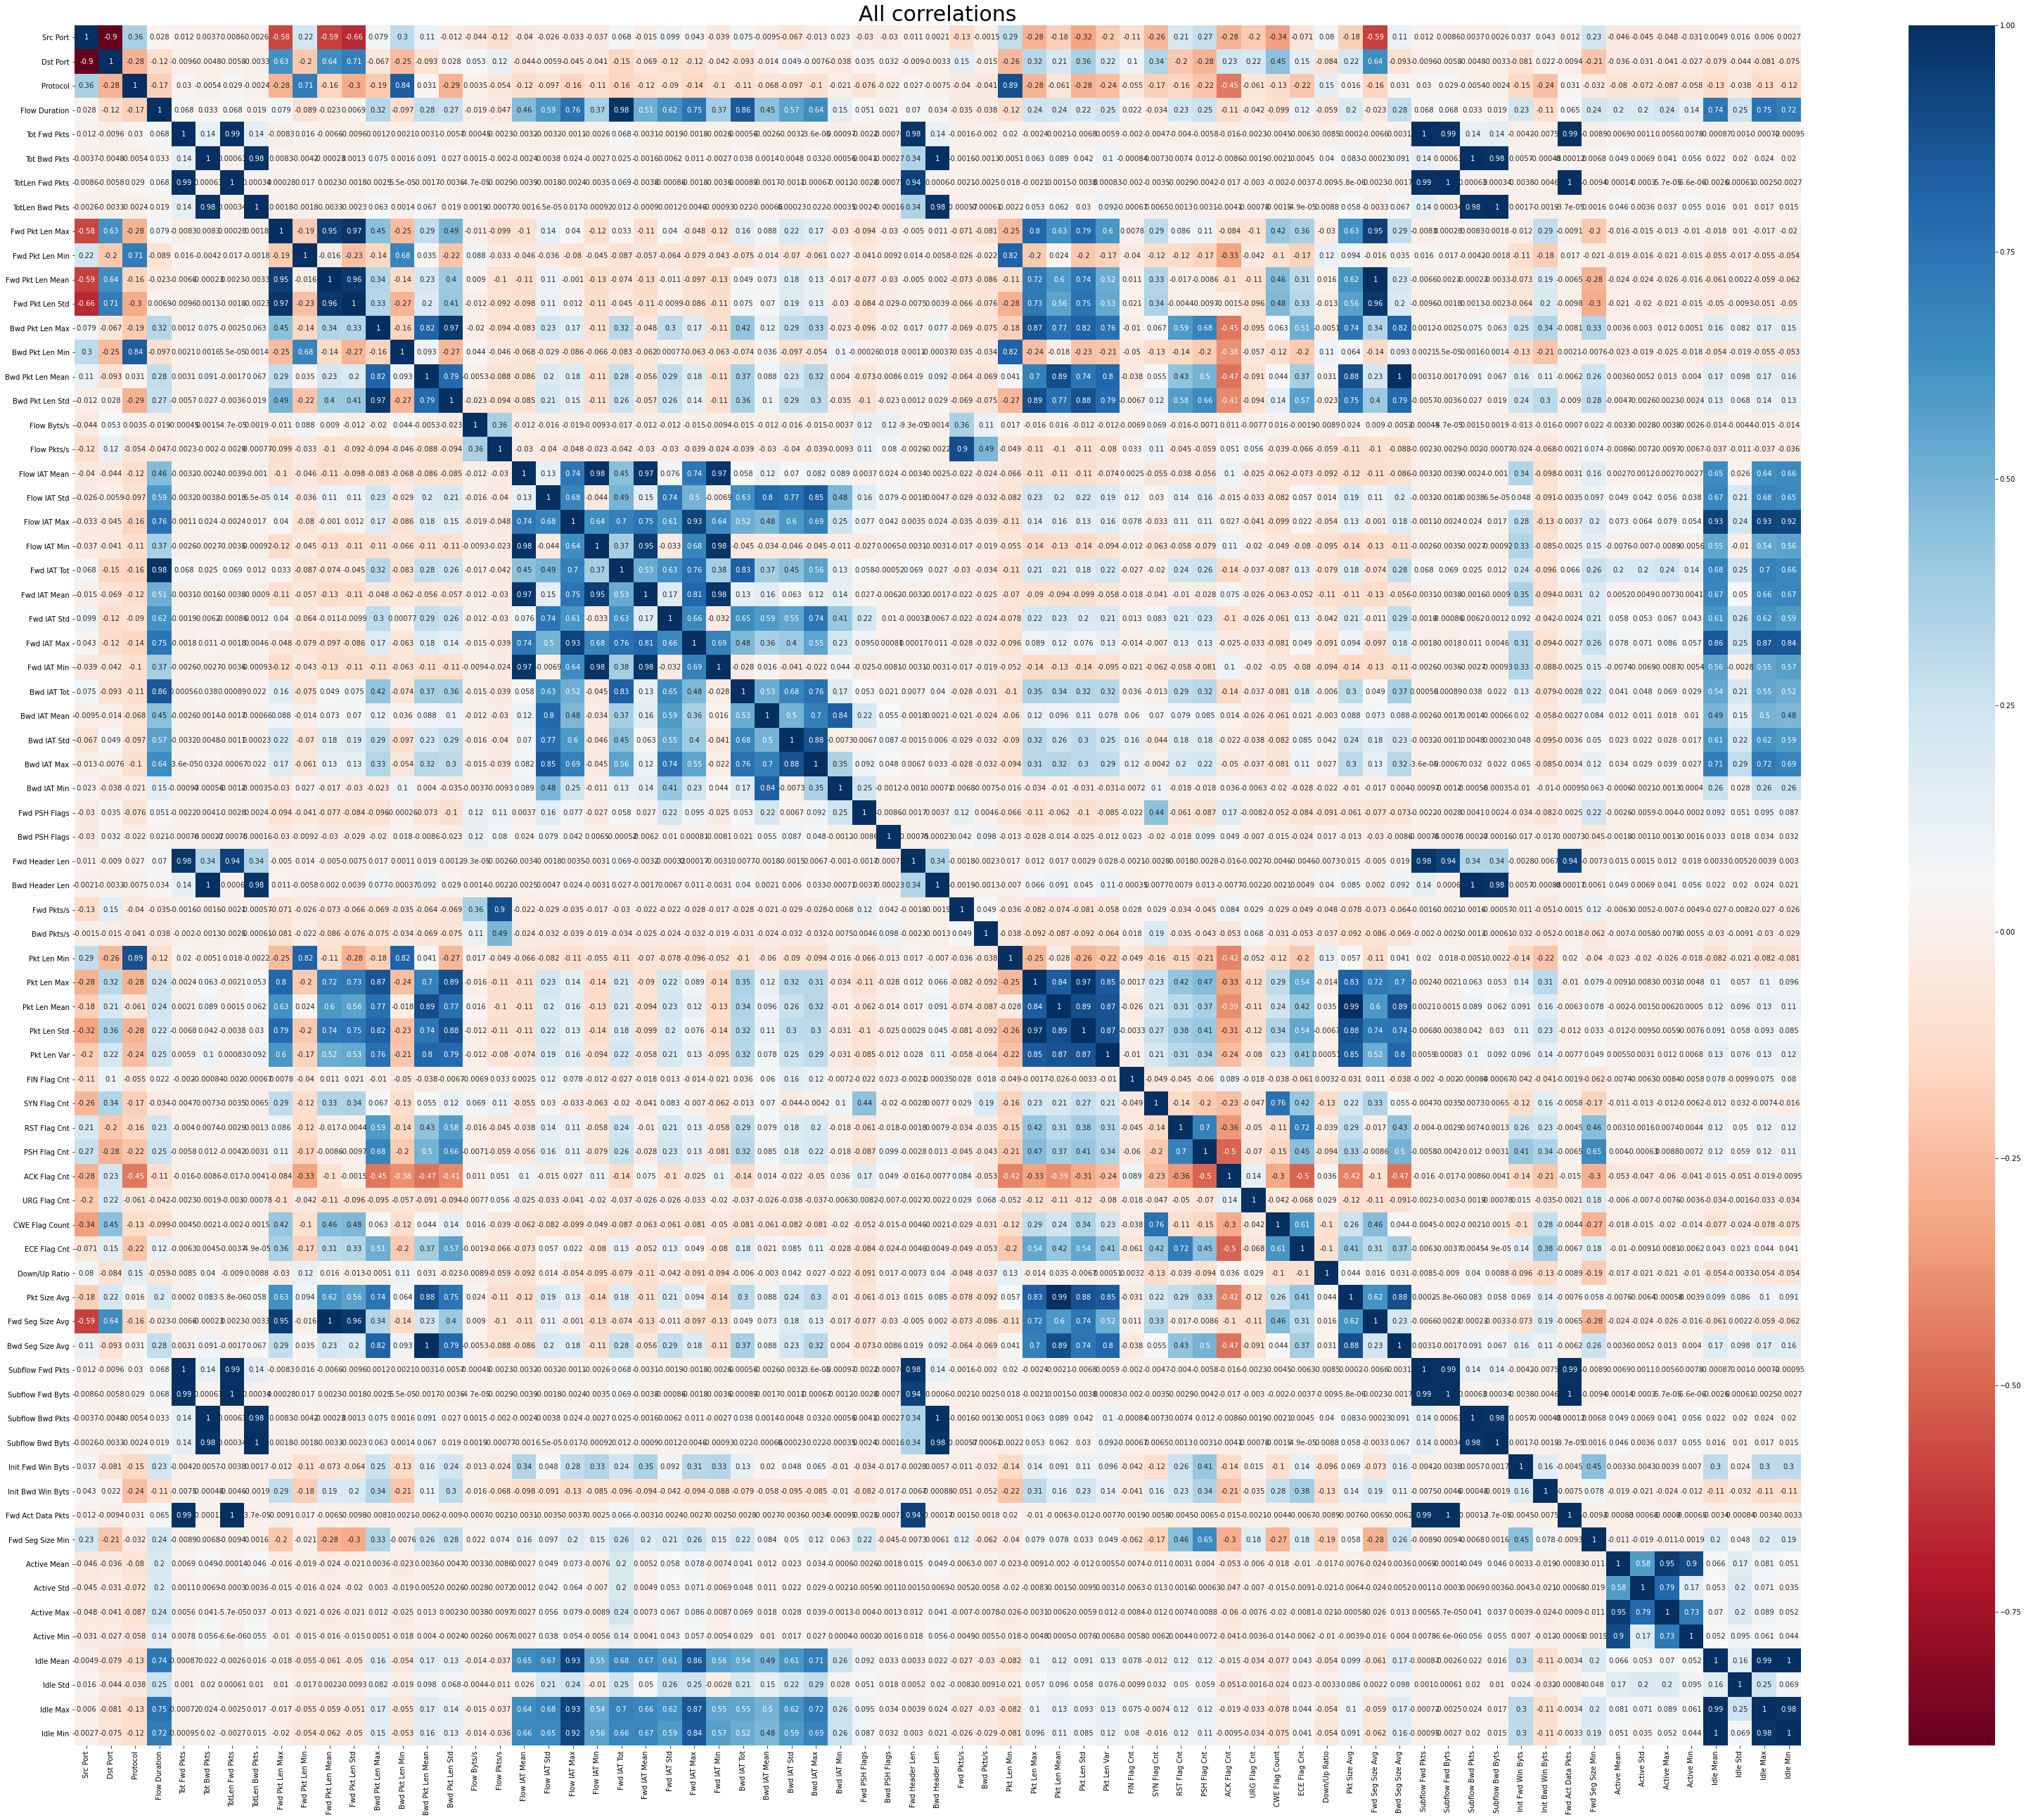

In [10]:
cormap(X,"All correlations")

In [11]:
#Удалим коррелирующие признаки при помощи фреймворка FeatureSelector
from feature_selector import FeatureSelector

In [12]:
fs = FeatureSelector(data = X, labels = y)
fs.identify_collinear(correlation_threshold = 0.50)

51 features with a correlation magnitude greater than 0.50.



## Важное дополнение
При обучении модели, работающей с сетевыми данными не рекомендуется использовать IP-адреса, так как злоумышленник может подменить его, а модель придает IP-адресам большую значимость(см. old_model/). В модели нужно использовать только системные признаки(т. е. не зависящие от хакера). Также были удалены признаки, которые имеют значительный вес и отрицательно влияют на обобщающую способность модели.

In [13]:
# список признаков для удаления
ip_features = ['Flow ID','Src IP','Dst IP','Timestamp','Init Fwd Win Byts','Init Bwd Win Byts']
collinear_features = fs.ops['collinear']
collinear_features.extend(ip_features)
X = X.drop(collinear_features,axis=1)
X.head()

,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Max,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd PSH Flags,Bwd PSH Flags,Bwd Pkts/s,FIN Flag Cnt,SYN Flag Cnt,URG Flag Cnt,Down/Up Ratio,Active Mean,Idle Std
0,64777,6,2028,1,1,0.0,0.000000,986.193294,2.028000e+03,0,0,493.096647,0,0,0,1.0,0.000000,0.000000
1,80,6,1763,4,3,324.0,714123.652864,3970.504821,2.938333e+02,0,0,1701.644923,0,1,0,0.0,0.000000,0.000000
2,50360,6,119961344,14,19,1460.0,60.827928,0.275089,3.748792e+06,0,0,0.158384,0,0,0,1.0,155920.666667,377288.595924
3,59992,6,1101,1,1,0.0,0.000000,1816.530427,1.101000e+03,0,0,908.265213,0,0,0,1.0,0.000000,0.000000
4,54899,17,37121,2,2,97.0,7165.755233,107.755718,1.237367e+04,0,0,53.877859,0,0,0,1.0,0.000000,0.000000


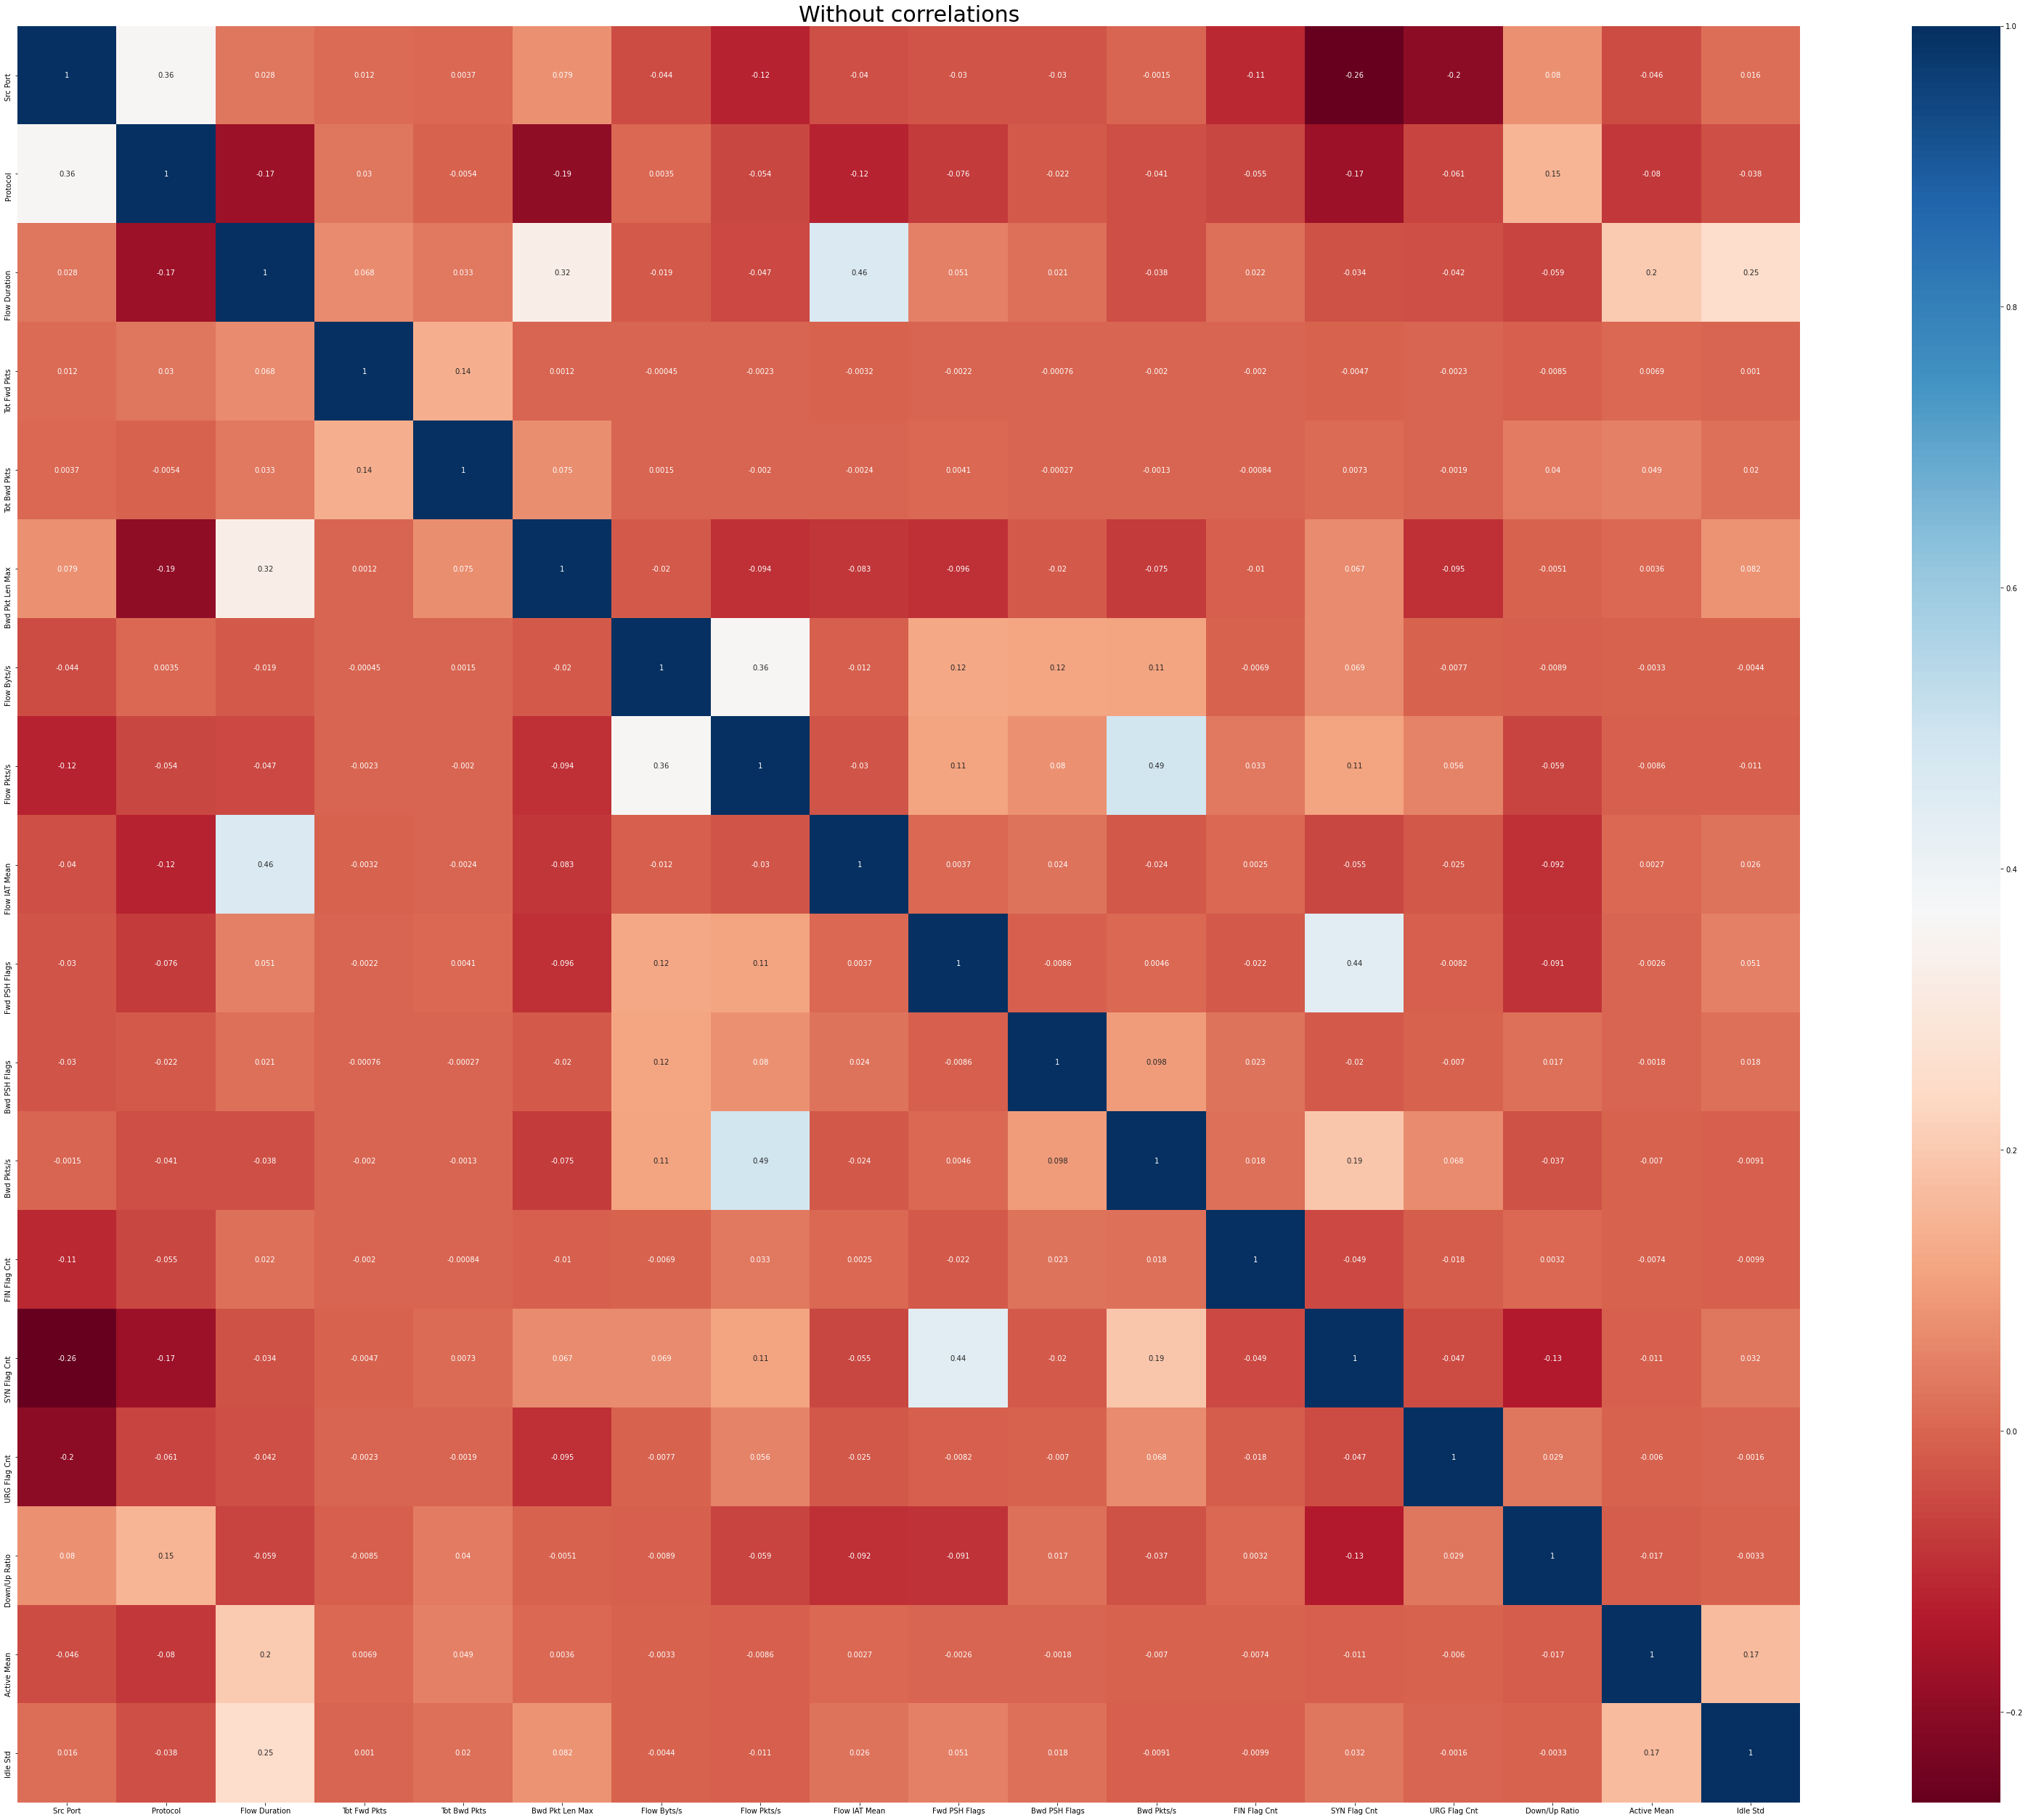

In [14]:
cormap(X,"Without correlations")

In [15]:
y =y.replace("ddos",1).replace("Benign",0)
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Label, dtype: int64

In [16]:
df_data = get_small(path="/Users/evgenii/DDoS Dataset/final_dataset.csv",size=200000,random_state=42)

In [18]:
data = data.drop(collinear_features,axis=1)
df_data = unique(df_data)
df_data = df_data.drop(collinear_features,axis=1)

In [19]:
data['Label'] = data['Label'].replace("ddos",1).replace("Benign",0)
df_data['Label'] = df_data['Label'].replace("ddos",1).replace("Benign",0)

In [20]:
data.to_csv('Dataset.csv')
df_data.to_csv('Test.csv')